In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import datetime
from dateutil import parser

#df1 for paslon 1, df2 for paslon 2, df3 for paslon 3
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
df1 = pd.read_csv('label_visualisasi2/agussylvifixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
df2 = pd.read_csv('label_visualisasi2/ahokdjarotfixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
df3 = pd.read_csv('label_visualisasi2/aniessandifixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
df1['just_date'] = df1['date'].dt.date
df2['just_date'] = df2['date'].dt.date
df3['just_date'] = df3['date'].dt.date
df1['count'] = 1
df2['count'] = 1
df3['count'] = 1

dcounts1 = df1.groupby(by=['sentimen_1', 'just_date']).count()
dfcounts1 = dcounts1.unstack(level='sentimen_1')['count']
dfcounts1 = dfcounts1.reset_index('date')
dfcounts1.columns = ['date','negative','neutral','positive']

dcounts2 = df2.groupby(by=['sentimen_2', 'just_date']).count()
dfcounts2 = dcounts2.unstack(level='sentimen_2')['count']
dfcounts2 = dfcounts2.reset_index('date')
dfcounts2.columns = ['date','negative','neutral','positive']

dcounts3 = df3.groupby(by=['sentimen_3', 'just_date']).count()
dfcounts3 = dcounts3.unstack(level='sentimen_3')['count']
dfcounts3 = dfcounts3.reset_index('date')
dfcounts3.columns = ['date','negative','neutral','positive']

#chart for positive sentiments
paslon1_pos = go.Scatter(
                x=dfcounts1['date'],
                y=dfcounts1['positive'],
                name = "Agus-Sylvi",
                line = dict(color = '#0d0e0f'),
                opacity = 0.8)

paslon2_pos = go.Scatter(
                x=dfcounts2['date'],
                y=dfcounts2['positive'],
                name = "Ahok-Djarot",
                line = dict(color = '#D91E18'),
                opacity = 0.8)

paslon3_pos = go.Scatter(
                x=dfcounts3['date'],
                y=dfcounts3['positive'],
                name = "Anies-Sandi",
                line = dict(color = '#3A539B'),
                opacity = 0.8)

data = [paslon1_pos, paslon2_pos, paslon3_pos]

layout = dict(
    title = "Grafik Sentimen Positif Masyarakat pada Twitter terhadap Paslon DKI Jakarta 2017"
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename = "Grafik Positif Paslon")

In [3]:
#chart for negative sentiments
paslon1_neg = go.Scatter(
                x=dfcounts1['date'],
                y=dfcounts1['negative'],
                name = "Agus-Sylvi",
                line = dict(color = '#0d0e0f'),
                opacity = 0.8)

paslon2_neg = go.Scatter(
                x=dfcounts2['date'],
                y=dfcounts2['negative'],
                name = "Ahok-Djarot",
                line = dict(color = '#D91E18'),
                opacity = 0.8)

paslon3_neg = go.Scatter(
                x=dfcounts3['date'],
                y=dfcounts3['negative'],
                name = "Anies-Sandi",
                line = dict(color = '#3A539B'),
                opacity = 0.8)

data = [paslon1_neg, paslon2_neg, paslon3_neg]

layout = dict(
    title = "Grafik Sentimen Negatif Masyarakat pada Twitter terhadap Paslon DKI Jakarta 2017"
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename = "Grafik Negatif Paslon")

In [4]:
#chart for neutral sentiments
paslon1_net = go.Scatter(
                x=dfcounts1['date'],
                y=dfcounts1['neutral'],
                name = "Agus-Sylvi",
                line = dict(color = '#0d0e0f'),
                opacity = 0.8)

paslon2_net = go.Scatter(
                x=dfcounts2['date'],
                y=dfcounts2['neutral'],
                name = "Ahok-Djarot",
                line = dict(color = '#D91E18'),
                opacity = 0.8)

paslon3_net = go.Scatter(
                x=dfcounts3['date'],
                y=dfcounts3['neutral'],
                name = "Anies-Sandi",
                line = dict(color = '#3A539B'),
                opacity = 0.8)

data = [paslon1_net, paslon2_net, paslon3_net]

layout = dict(
    title = "Grafik Sentimen Netral Masyarakat pada Twitter terhadap Paslon DKI Jakarta 2017"
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename = "Grafik Netral Paslon")

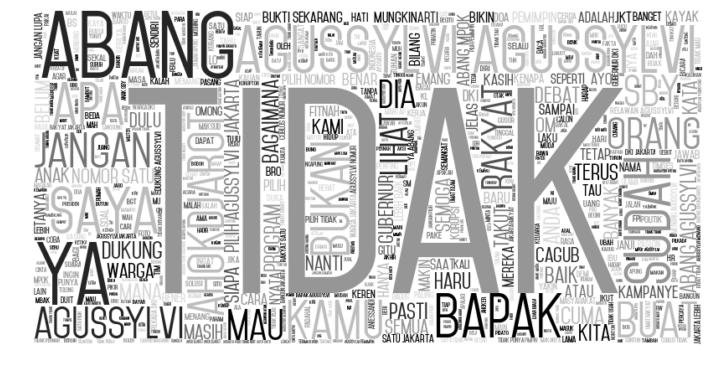

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import pandas as pd
import datetime
from dateutil import parser
from palettable.colorbrewer.sequential import Greys_9
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.sequential import Blues_9

dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
df1 = pd.read_csv('label_visualisasi2/agussylvifixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
df2 = pd.read_csv('label_visualisasi2/ahokdjarotfixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
df3 = pd.read_csv('label_visualisasi2/aniessandifixeditSS.csv', sep=',', parse_dates=['date'], date_parser=dateparse)
font_path = "font/Mohave.otf"

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greys_9.colors[random.randint(2,8)])

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_9.colors[random.randint(2,8)])

def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Blues_9.colors[random.randint(2,8)])

#make wordcloud for the Candidate 1 
words_array = df1.text
str1 = ' '.join(str(e) for e in words_array)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, max_font_size=300, width=800, height=400)
wc.generate(str1)
wc.recolor(color_func=grey_color_func)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

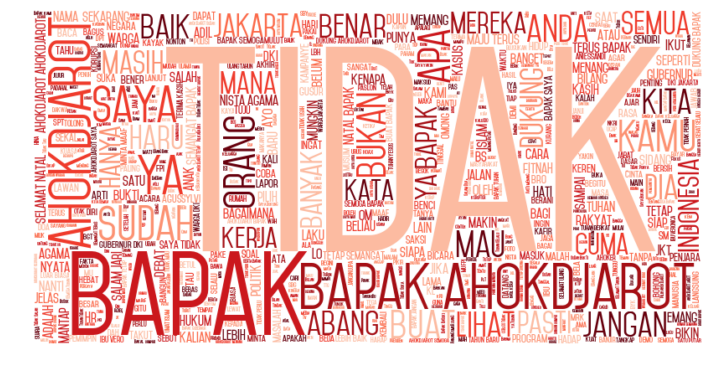

In [7]:
#make wordcloud for the Candidate 2
words_array = df2.text
str2 = ' '.join(str(e) for e in words_array)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, max_font_size=300, width=800, height=400)
wc.generate(str2)
wc.recolor(color_func=red_color_func)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

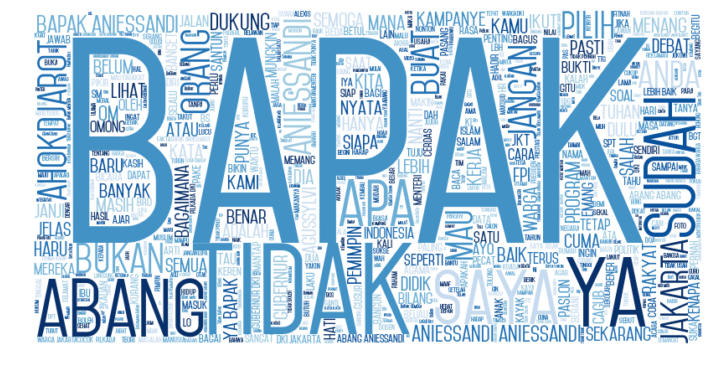

In [10]:
#make wordcloud for the Candidate 3
words_array = df3.text
str3 = ' '.join(str(e) for e in words_array)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, max_font_size=300, width=800, height=400)
wc.generate(str3)
wc.recolor(color_func=blue_color_func)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()